# Sistemas Inteligentes para Bioinformática

Exemplos de validação de código. Deverá corrigir os imports e diretórios de acordo com a sua implementação.

In [1]:
from si.data import Dataset
from si.util import summary
import os

In [2]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/breast-bin.data')

## Labeled dataset

In [3]:
dataset = Dataset.from_data(filename, labeled=True)

In [4]:
dataset.X[:5, :]

array([[8., 4., 4., 1., 2., 9., 3., 3., 1.],
       [5., 1., 1., 3., 2., 1., 1., 1., 1.],
       [2., 1., 1., 1., 3., 1., 2., 1., 1.],
       [2., 1., 1., 1., 2., 1., 3., 1., 1.],
       [9., 5., 8., 1., 2., 3., 2., 1., 5.]])

In [5]:
dataset.y[:5]

array([1., 0., 0., 0., 1.])

In [6]:
print("Has label:", dataset.hasLabel())
print("Number of features:", dataset.getNumFeatures())
print("Number of classes:", dataset.getNumClasses())
summary(dataset)

Has label: True
Number of features: 9
Number of classes: 2


,mean,std,var,max,min
A,4.417740,2.813726,7.917053,10.0,1.0
B,3.134478,3.049276,9.298082,10.0,1.0
C,3.207439,2.969786,8.819630,10.0,1.0
D,2.806867,2.853336,8.141527,10.0,1.0
E,3.216023,2.212715,4.896110,10.0,1.0
F,3.486409,3.619337,13.099601,10.0,1.0
G,3.437768,2.436619,5.937114,10.0,1.0
H,2.866953,3.051449,9.311340,10.0,1.0
I,1.589413,1.713851,2.937284,10.0,1.0
y,0.344778,0.475296,0.225906,1.0,0.0


In [7]:
dataset.toDataframe()

,A,B,C,D,E,F,G,H,I,y
0,8.0,4.0,4.0,1.0,2.0,9.0,3.0,3.0,1.0,1.0
1,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
2,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
4,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0
695,5.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
696,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
697,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0


## Standard Scaler

In [8]:
from si.util.scale import StandardScaler
sc = StandardScaler()
ds2 = sc.fit_transform(dataset)
summary(ds2)

,mean,std,var,max,min
A,-5.034917e-17,1.000000,1.000000,1.983939,-1.214667
B,2.361805e-16,1.000000,1.000000,2.251526,-0.699995
C,1.224581e-16,1.000000,1.000000,2.287222,-0.743299
D,2.816059e-16,1.000000,1.000000,2.520955,-0.633247
E,2.681054e-16,1.000000,1.000000,3.065906,-1.001495
F,-6.480272e-16,1.000000,1.000000,1.799664,-0.686979
G,4.034287e-17,1.000000,1.000000,2.693171,-1.000471
H,-2.642934e-16,1.000000,1.000000,2.337594,-0.611825
I,-7.290306e-17,1.000000,1.000000,4.907421,-0.343912
y,3.447783e-01,0.475296,0.225906,1.000000,0.000000


# Feature Selection

In [9]:
from si.util.feature_selection import f_regression, KBest, VarianceThreshold

## Variance Threshold

In [10]:
vt = VarianceThreshold(8)
ds2 = vt.fit_transform(dataset)
summary(ds2)

,mean,std,var,max,min
B,3.134478,3.049276,9.298082,10.0,1.0
C,3.207439,2.969786,8.819630,10.0,1.0
D,2.806867,2.853336,8.141527,10.0,1.0
F,3.486409,3.619337,13.099601,10.0,1.0
H,2.866953,3.051449,9.311340,10.0,1.0
y,0.344778,0.475296,0.225906,1.0,0.0


## SelectKBest

In [11]:
# SelectKBest for classification
skb = KBest(5)
ds3 = skb.fit_transform(dataset)
summary(ds3)


,mean,std,var,max,min
A,4.417740,2.813726,7.917053,10.0,1.0
G,3.437768,2.436619,5.937114,10.0,1.0
B,3.134478,3.049276,9.298082,10.0,1.0
C,3.207439,2.969786,8.819630,10.0,1.0
F,3.486409,3.619337,13.099601,10.0,1.0
y,0.344778,0.475296,0.225906,1.0,0.0


# Clustering

In [12]:
from si.unsupervised import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# o dataset iris nao estava inicialmente no github
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")

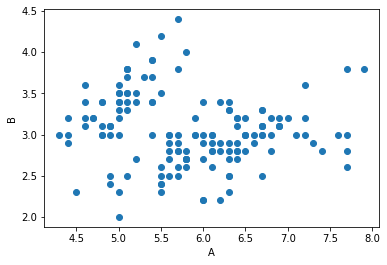

In [14]:
# indice das features para o plot
c1 = 0
c2 = 1
# plot
plt.scatter(iris.X[:,c1], iris.X[:,c2])
plt.xlabel(iris.xnames[c1])
plt.ylabel(iris.xnames[c2])
plt.show()

In [15]:
kmeans = KMeans(3)
cent, clust = kmeans.fit_transform(iris)
print(cent, clust)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


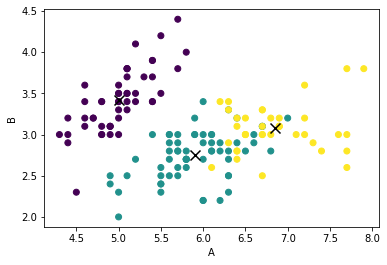

In [16]:

plt.scatter(iris.X[:,c1], iris.X[:,c2],c=clust)
plt.scatter(cent[:,c1],cent[:,c2], s = 100, c = 'black',marker='x')
plt.xlabel(iris.xnames[c1])
plt.ylabel(iris.xnames[c2])
plt.show()
# podem obter clusterings diferentes já que estes dependem da escolha dos centroids iniciais

# PCA

In [17]:
from si.unsupervised import PCA, SVD
pca = PCA(2, function=SVD)

In [18]:
reduced = pca.fit_transform(iris)
print(pca.variance_explained())

[0.7277045209380132, 0.23030523267680664, 0.036838319576273926, 0.005151926808906308]


In [19]:
iris_pca = Dataset(reduced,iris.y,xnames=['pc1','pc2'],yname='class')
iris_pca.toDataframe()

,pc1,pc2,class
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.36795,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa
...,...,...,...
145,1.870522,-0.382822,Iris-virginica
146,1.558492,0.905314,Iris-virginica
147,1.520845,-0.266795,Iris-virginica
148,1.376391,-1.016362,Iris-virginica


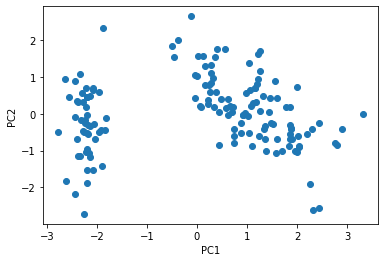

In [20]:
plt.scatter(iris_pca.X[:,0], iris_pca.X[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()